This is based on the following but with several changes because my main goal is to be able to plot indicators over the S&P 500 so that I can study the series.

https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

In [12]:
import pandas as pd
# Package and modules for importing data; this code may change depending on pandas version
import pandas.io.data as web
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2000,1,1)
end = datetime.date.today()

# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("^GSPC", "yahoo", start, end)
 
type(apple)

pandas.core.frame.DataFrame

In [13]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1441.469971


Populating the interactive namespace from numpy and matplotlib


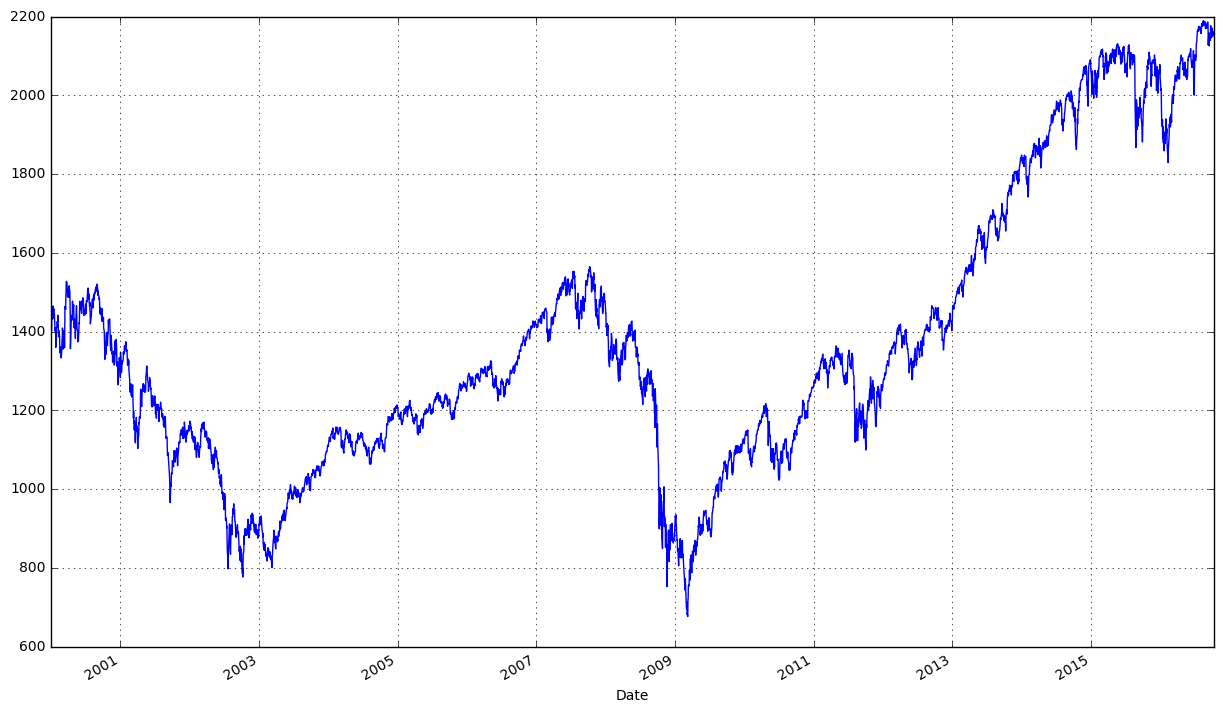

In [14]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL


In [7]:
import talib

ImportError: No module named 'talib'

In [8]:
%%bash
conda install -c quantopian ta-lib

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /Users/jcurzon/anaconda/envs/zipline:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.17              |                0         184 KB
    numpy-1.9.3                |           py34_3         2.6 MB
    pyparsing-2.0.3            |           py34_0          66 KB
    bcolz-0.12.1               |       np19py34_0         405 KB  quantopian
    bottleneck-1.0.0           |       np19py34_0         153 KB
    numexpr-2.4.6              |       np19py34_0         113 KB  quantopian
    scipy-0.17.1               |       np19py34_1        11.9 MB
    ta-lib-0.4.9               |       np19py34_0         835 KB  quantopian
    matplotlib-1.4.3           |       np19py34_3        41.1 MB
    pandas-0.16.2              |       np19py34_0         5.5 MB
    st

In [9]:
import talib

In [15]:
normalized = apple.apply(lambda x: x / x[0])
normalized.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2000-01-04,0.990451,0.984587,0.971544,0.961655,1.082850,0.961655
2000-01-05,0.952472,0.956204,0.957813,0.963504,1.164950,0.963504
2000-01-06,0.954303,0.955277,0.967838,0.964425,1.172247,0.964425
2000-01-07,0.955215,0.975284,0.973838,0.990551,1.314874,0.990551


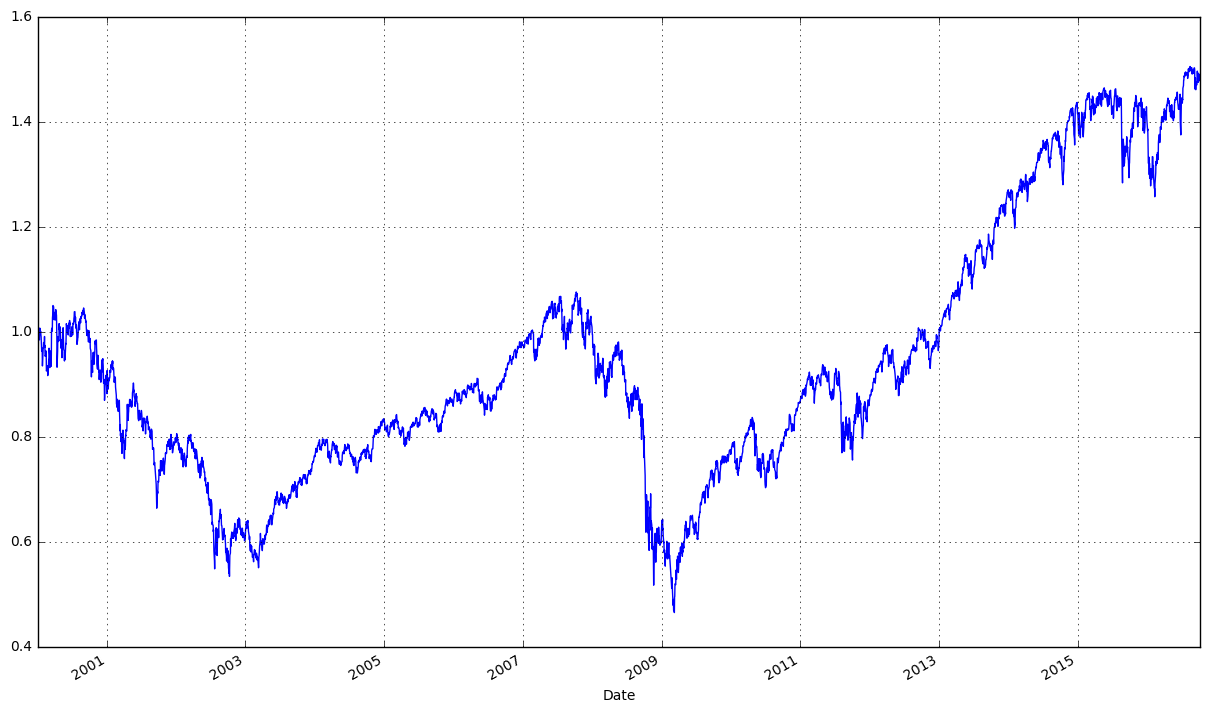

In [16]:
normalized["Adj Close"].plot(grid = True)

This post has some good examples of applying technical indicators to charts in python: http://www.eickonomics.com/posts/2014-03-25-python-vs-R-adding-TA-indicators/

In [17]:
data = pd.DataFrame({"GSPC": apple["Adj Close"]})

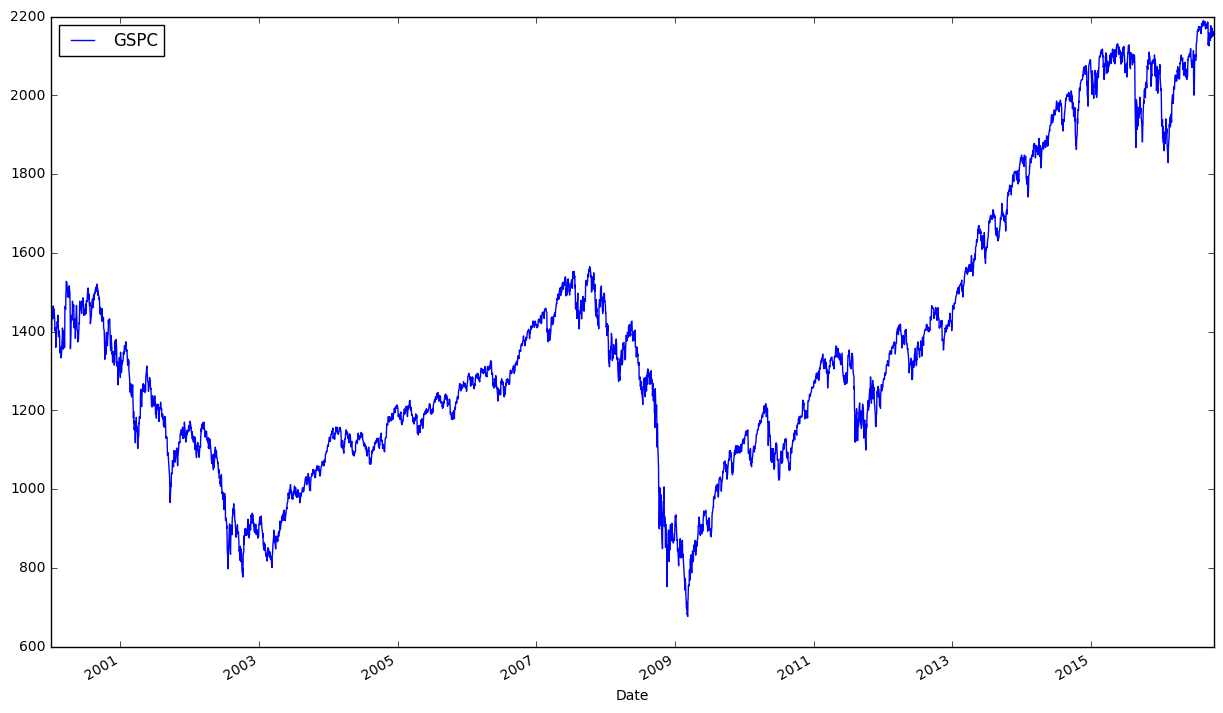

In [18]:
data.plot()

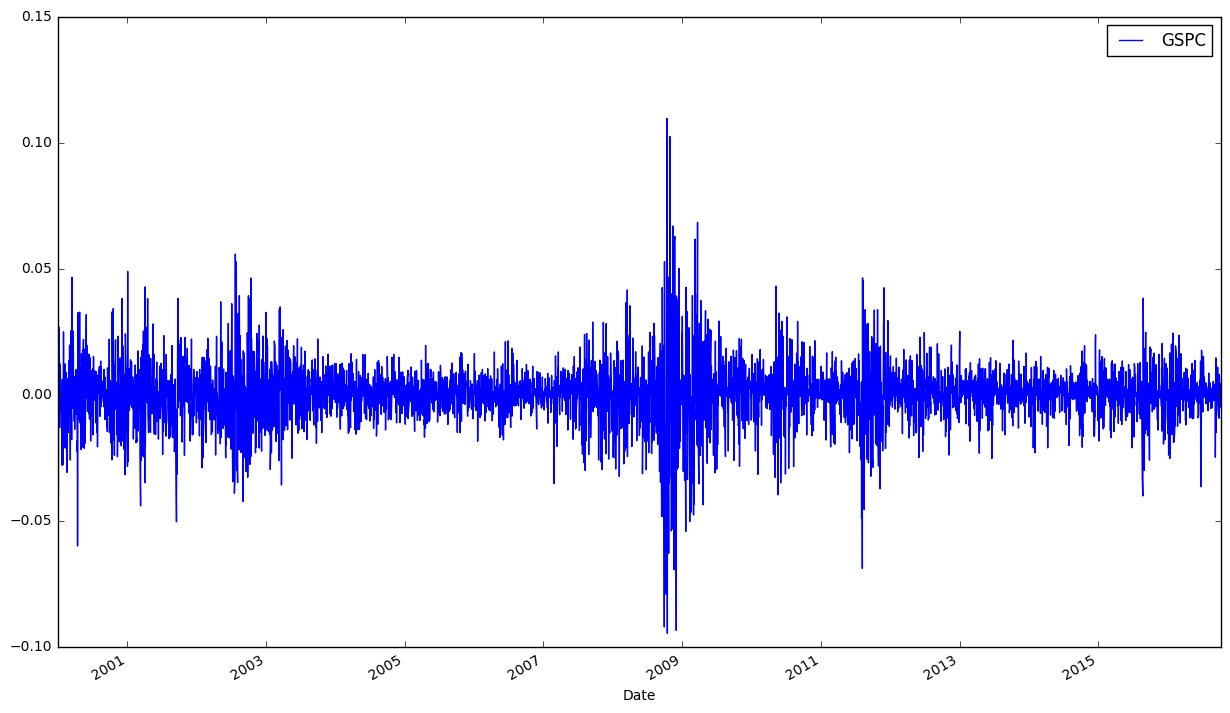

In [19]:
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change.plot()

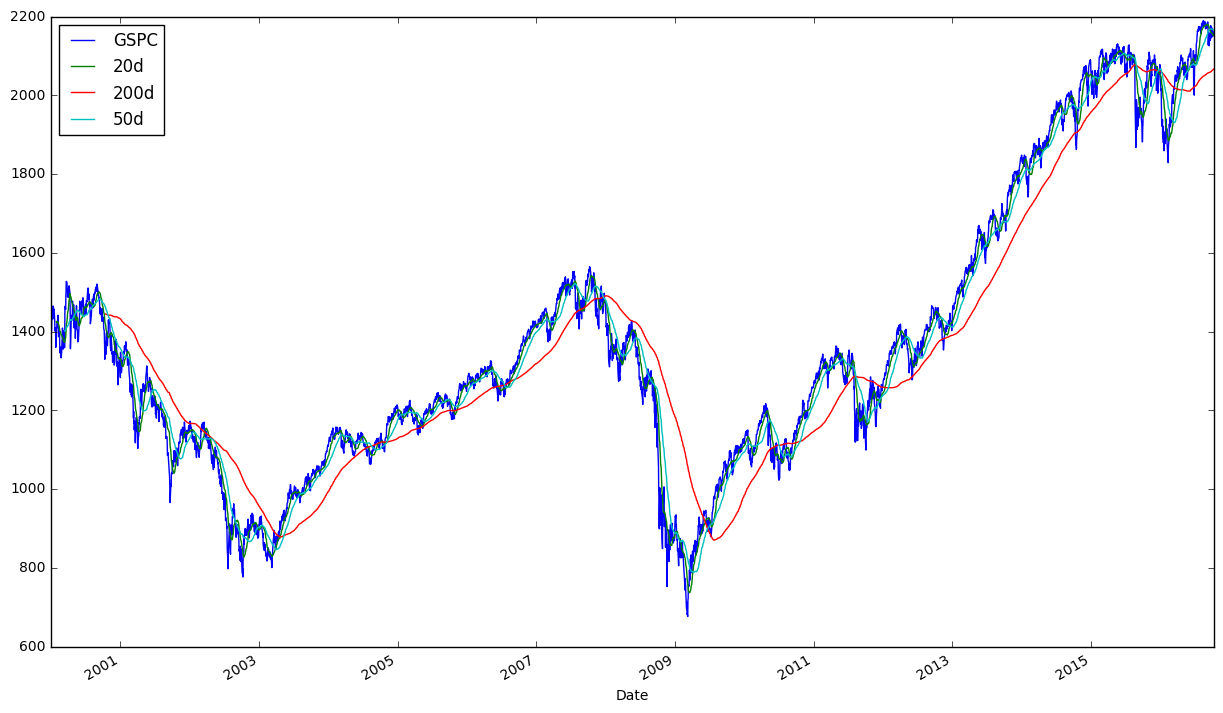

In [23]:
data["200d"] = np.round(pd.rolling_mean(data["GSPC"], window = 200, center = False), 2)
data["50d"] = np.round(pd.rolling_mean(data["GSPC"], window = 50, center = False), 2)
data.plot()

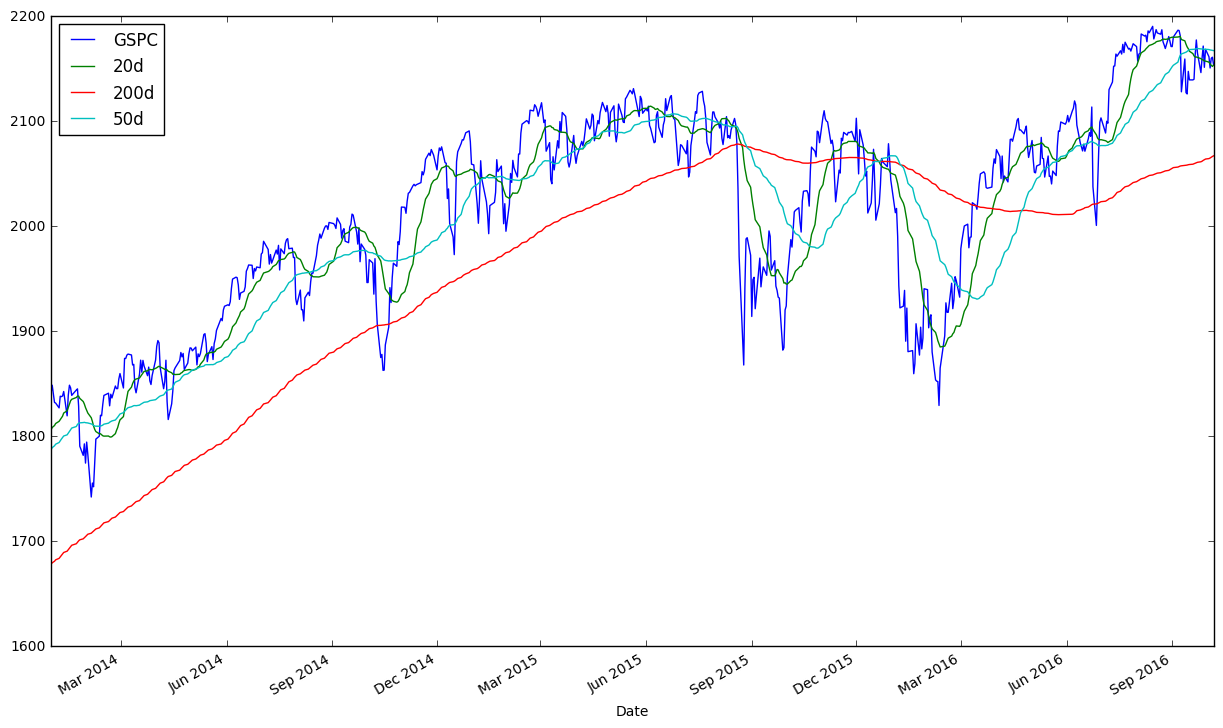

In [25]:
data.tail(700).plot()

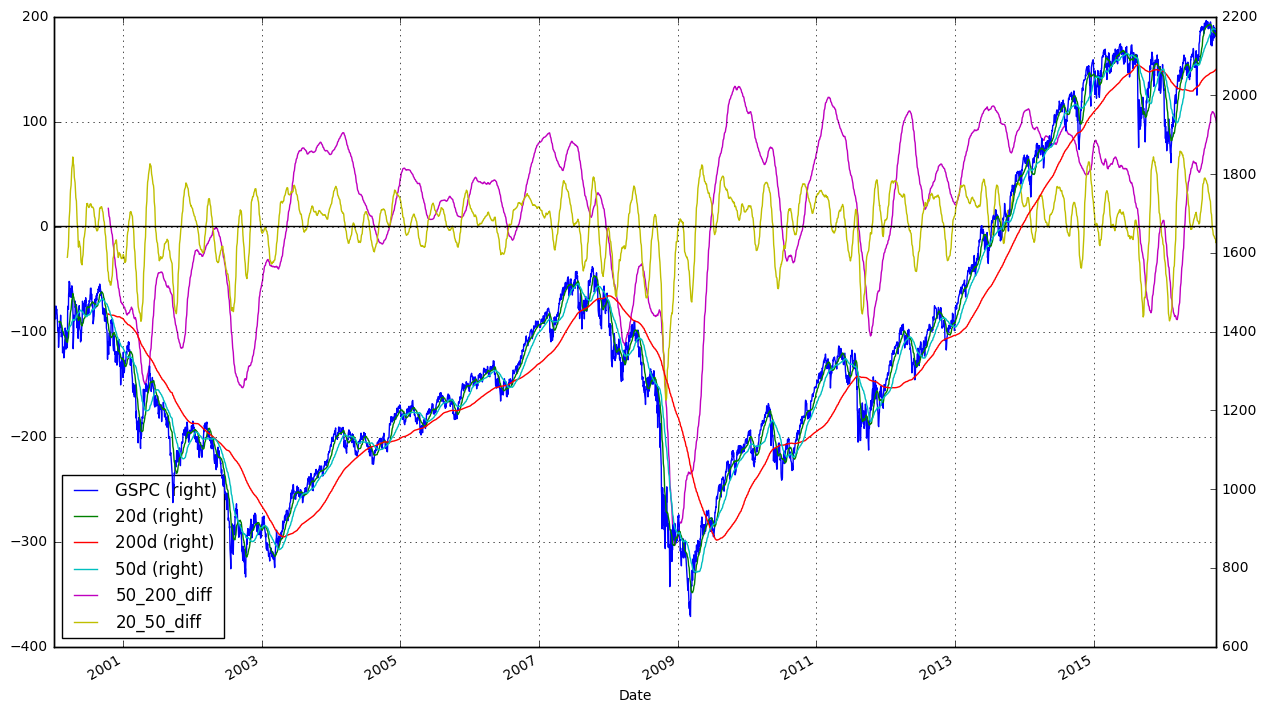

In [31]:
data["50_200_diff"] = data["50d"] - data["200d"]
data["20_50_diff"] = data["20d"] - data["50d"]
data.plot(secondary_y = ["GSPC", "20d", "50d", "200d"], grid = True).axhline(y = 1, color = "black", lw = 1)


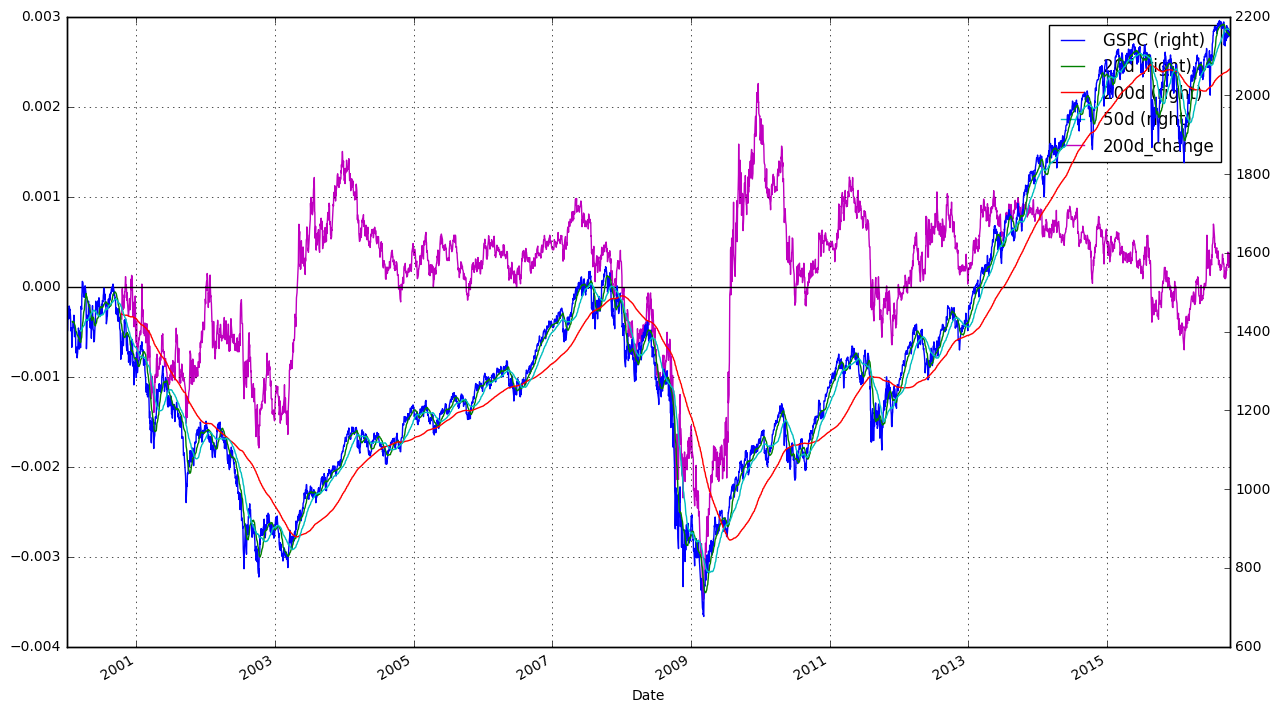

In [38]:
data2 = data.copy()
data2.drop("50_200_diff", 1, inplace=True)
data2.drop("20_50_diff", 1, inplace=True)
data2["200d_change"] = np.log(data["200d"]) - np.log(data["200d"].shift(1))
data2.plot(secondary_y = ["GSPC", "20d", "50d", "200d"], grid = True).axhline(y = 0, color = "black", lw = 1)

Next I want to read more about the momentum cross over strategies and tactical asset allocation which is what my charts above and interest are going towards.

- http://www.eickonomics.com/posts/2014-03-25-python-vs-R-adding-TA-indicators/
- https://www.quantstart.com/articles/Backtesting-a-Moving-Average-Crossover-in-Python-with-pandas
- https://trello.com/c/KBbjZE02/16-dynamic-asset-allocation-market-timing